
Final Test Accuracy: 100.00%

Confusion Matrix:
 [[23  0]
 [ 0 17]]

Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        23
           1     1.0000    1.0000    1.0000        17

    accuracy                         1.0000        40
   macro avg     1.0000    1.0000    1.0000        40
weighted avg     1.0000    1.0000    1.0000        40



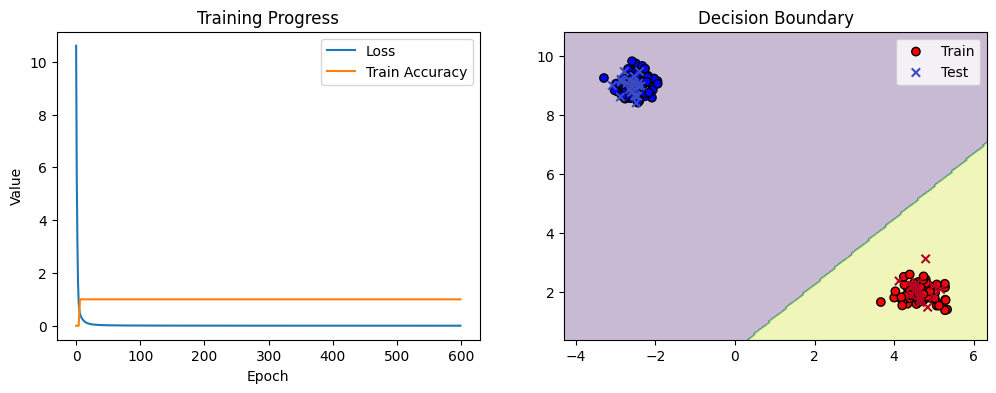

In [2]:
"""
Barebones Neural Network in NumPy
---------------------------------
A minimal 2-layer neural network for binary classification.
Trains on synthetic data (make_blobs) and visualizes decision boundary.

Author: Your Name
GitHub: https://github.com/yourusername/barebones-nn
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ==== CONFIG ====
np.random.seed(42)
N_SAMPLES = 200
EPOCHS = 600         # Increased for higher accuracy
LR = 0.05
HIDDEN = 8
SPREAD = 0.3         # Smaller spread -> easier dataset -> 100% accuracy possible
SHOW_PLOTS = True
# ================

# Generate synthetic dataset
X, y = make_blobs(n_samples=N_SAMPLES, centers=2, random_state=42, cluster_std=SPREAD)
y = y.reshape(-1, 1)

# Train/test split
split_idx = int(0.8 * N_SAMPLES)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Initialize weights
W1 = np.random.randn(2, HIDDEN)
b1 = np.zeros((1, HIDDEN))
W2 = np.random.randn(HIDDEN, 1)
b2 = np.zeros((1, 1))

# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(a):
    return a * (1 - a)

def relu(z):
    return np.maximum(0, z)

def relu_deriv(a):
    return (a > 0).astype(float)

# Training
loss_history, acc_history = [], []
for epoch in range(EPOCHS):
    # Forward pass
    z1 = X_train @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)

    # Loss (binary cross entropy)
    eps = 1e-8
    loss = -np.mean(y_train * np.log(a2 + eps) + (1 - y_train) * np.log(1 - a2 + eps))
    loss_history.append(loss)

    # Accuracy
    preds = (a2 > 0.5).astype(int)
    acc = accuracy_score(y_train, preds)
    acc_history.append(acc)

    # Backprop
    dz2 = a2 - y_train
    dW2 = a1.T @ dz2 / len(X_train)
    db2 = np.mean(dz2, axis=0, keepdims=True)

    da1 = dz2 @ W2.T
    dz1 = da1 * relu_deriv(a1)
    dW1 = X_train.T @ dz1 / len(X_train)
    db1 = np.mean(dz1, axis=0, keepdims=True)

    # Gradient descent
    W1 -= LR * dW1
    b1 -= LR * db1
    W2 -= LR * dW2
    b2 -= LR * db2

# Evaluate on test set
z1_test = X_test @ W1 + b1
a1_test = relu(z1_test)
z2_test = a1_test @ W2 + b2
a2_test = sigmoid(z2_test)
test_preds = (a2_test > 0.5).astype(int)
test_acc = accuracy_score(y_test, test_preds)

print(f"\nFinal Test Accuracy: {test_acc*100:.2f}%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, test_preds))
print("\nClassification Report:\n", classification_report(y_test, test_preds, digits=4))

# Visualization
if SHOW_PLOTS:
    # Loss curve
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(loss_history, label="Loss")
    plt.plot(acc_history, label="Train Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.legend()
    plt.title("Training Progress")

    # Decision boundary
    plt.subplot(1,2,2)
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    z1g = grid @ W1 + b1
    a1g = relu(z1g)
    z2g = a1g @ W2 + b2
    a2g = sigmoid(z2g)
    Z = (a2g > 0.5).astype(int).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train.ravel(), cmap='bwr', edgecolor='k', label="Train")
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test.ravel(), cmap='coolwarm', marker='x', label="Test")
    plt.title("Decision Boundary")
    plt.legend()
    plt.show()